In [1]:




from google.colab import files
uploaded=files.upload()




Saving kaggle.json to kaggle.json


In [2]:
mkdir ~/.kaggle

In [3]:
cp kaggle.json ~/.kaggle

In [4]:

import os
os.chmod("kaggle.json",600)


In [5]:

from time import time 
from kaggle.api.kaggle_api_extended import KaggleApi

s=time()
api = KaggleApi()
api.authenticate()
#api.dataset_download_files("ming666/flicker8k-dataset")
#api.dataset_download_files("watts2/glove6b50dtxt")
api.dataset_download_files("hsankesara/flickr-image-dataset")

e=time()

diff=e-s

print(diff)


187.5042107105255


In [34]:



from kaggle.api.kaggle_api_extended import KaggleApi

from time import time 

s=time()
api = KaggleApi()
api.authenticate()
#api.dataset_download_files("ming666/flicker8k-dataset")
api.dataset_download_files("watts2/glove6b50dtxt")

e=time()

diff=e-s

print(diff)











# importing required modules 
from zipfile import ZipFile 

# specifying the zip file name 
#file_name = "flicker8k-dataset.zip"
file_name ="/content/glove6b50dtxt.zip"

# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
  # printing all the contents of the zip file 
  zip.printdir() 

  # extracting all the files 
  print('Extracting all the files now...') 
  zip.extractall() 
  print('Done!') 




1.155691146850586
File Name                                             Modified             Size
glove.6B.50d.txt                               2019-09-25 22:17:58    171350079
Extracting all the files now...
Done!


In [5]:


# importing required modules 
from zipfile import ZipFile 

# specifying the zip file name 
#file_name = "flicker8k-dataset.zip"
file_name ="/content/flickr-image-dataset.zip"

# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
  # printing all the contents of the zip file 
  zip.printdir() 

  # extracting all the files 
  print('Extracting all the files now...') 
  zip.extractall() 
  print('Done!') 


In [6]:


# importing required modules 
from zipfile import ZipFile 

# specifying the zip file name 
#file_name = "flicker8k-dataset.zip"
file_name ="/content/flickr-image-dataset.zip"

# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
  # printing all the contents of the zip file 
  zip.printdir() 

  # extracting all the files 
  print('Extracting all the files now...') 
  zip.extractall() 
  print('Done!') 


Streaming output truncated to the last 5000 lines.
flickr30k_images/flickr30k_images/75897060.jpg 2019-10-01 13:27:44        93999
flickr30k_images/flickr30k_images/759003091.jpg 2019-10-01 13:27:44       161410
flickr30k_images/flickr30k_images/759015118.jpg 2019-10-01 13:27:44       110934
flickr30k_images/flickr30k_images/75902252.jpg 2019-10-01 13:27:44       128000
flickr30k_images/flickr30k_images/75902281.jpg 2019-10-01 13:27:44       131230
flickr30k_images/flickr30k_images/75902338.jpg 2019-10-01 13:27:44        94187
flickr30k_images/flickr30k_images/75902708.jpg 2019-10-01 13:27:44        97128
flickr30k_images/flickr30k_images/75902723.jpg 2019-10-01 13:27:44       115970
flickr30k_images/flickr30k_images/7591649888.jpg 2019-10-01 13:27:44       128112
flickr30k_images/flickr30k_images/7591663030.jpg 2019-10-01 13:27:44       124702
flickr30k_images/flickr30k_images/7594999748.jpg 2019-10-01 13:27:44       208951
flickr30k_images/flickr30k_images/75953797.jpg 2019-10-01 13:

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
flickr30k_images/flickr30k_images/flickr30k_images/5356236664.jpg 2019-10-01 13:35:00       112048
flickr30k_images/flickr30k_images/flickr30k_images/5356318668.jpg 2019-10-01 13:35:00       162652
flickr30k_images/flickr30k_images/flickr30k_images/535830521.jpg 2019-10-01 13:35:00       135648
flickr30k_images/flickr30k_images/flickr30k_images/5359437945.jpg 2019-10-01 13:35:00       159557
flickr30k_images/flickr30k_images/flickr30k_images/5361355399.jpg 2019-10-01 13:35:00        94812
flickr30k_images/flickr30k_images/flickr30k_images/53614287.jpg 2019-10-01 13:35:00        95983
flickr30k_images/flickr30k_images/flickr30k_images/536147209.jpg 2019-10-01 13:35:00       127725
flickr30k_images/flickr30k_images/flickr30k_images/5361551308.jpg 2019-10-01 13:35:00       170899
flickr30k_images/flickr30k_images/flickr30k_images/536156200.jpg 2019-10-01 13:35:00       126913
flickr30k_images/flickr30k_images/flickr30k_images/5362687336.j

In [7]:
ls

flickr30k_images/  flickr-image-dataset.zip  kaggle.json*  sample_data/


In [18]:
import pandas as pd
import numpy as np
import re
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.applications.resnet50 import ResNet50,preprocess_input
from keras.models import Model
from keras.layers import *
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [19]:
df=pd.read_csv('/content/flickr30k_images/results.csv',delimiter='|')

df.head()

df.iloc[0]

id=df['image_name'].values

id.shape

comment=df[' comment'].values

comment.shape

comment[5]

def sentence_cleaning(sentence):
    try:
        sentence=sentence.lower()
        sentence=re.sub('[^a-z]+',' ',sentence)
        sentence=sentence.split()
        sentence=[s for s in sentence if len(s)>1]
        sentence=' '.join(sentence)
        return(sentence)
    except:
        return(sentence_cleaning('A dog runs across the grass .'))

vocab_dic={}
for i in range(comment.shape[0]):
    if id[i] not in vocab_dic:
        vocab_dic[id[i]]=[]
    sen=sentence_cleaning(comment[i])
    vocab_dic[id[i]].append(sen)

len(vocab_dic)

print(vocab_dic['1000092795.jpg'])

word_dic={}

for i in vocab_dic:
    for j in vocab_dic[i]:
        l=j.split()
        for k in l:
            if k not in word_dic:
                word_dic[k]=1
            else:
                word_dic[k]+=1

print(len(word_dic))

final_words=[x for x in word_dic if word_dic[x]>10]

print(len(final_words))

for i in vocab_dic:
    for j in range(len(vocab_dic[i])):
        vocab_dic[i][j]='startseq '+vocab_dic[i][j]+' endseq'

s=1
word_to_idx={}
idx_to_word={}
for i in final_words:
    word_to_idx[i]=s
    idx_to_word[s]=i
    s+=1

print(len(word_to_idx))

### Two Special words
word_to_idx['startseq']=5119
word_to_idx['endseq']=5120
idx_to_word[5119]='startseq'
idx_to_word[5120]='endseq'

len(word_to_idx)

vocab_size=len(word_to_idx)+1 # adding one for 0 because that will also in our vector

max_len=20

['two young guys with shaggy hair look at their hands while hanging out in the yard', 'two young white males are outside near many bushes', 'two men in green shirts are standing in yard', 'man in blue shirt standing in garden', 'two friends enjoy time spent together']
18054
5118
5118


In [20]:
model=ResNet50(weights='imagenet',input_shape=(224,224,3))


102973440/102967424 [==============================] - 2s 0us/step


In [21]:
new_model=Model(model.input,model.layers[-2].output)


In [22]:
def preprocess_img(path):
    img=image.load_img(path,target_size=(224,224,3))
    img=image.img_to_array(img)
    img=img.reshape(1,224,224,3)
    img=preprocess_input(img)#mormalizing the img
    return img

In [23]:
img=preprocess_img('/content/flickr30k_images/flickr30k_images/10002456.jpg')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


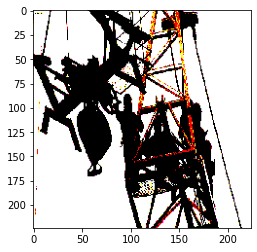

In [24]:
plt.imshow(img[0])


In [25]:
def encode_img(path):
    img=preprocess_img(path)
    feature_vector=new_model.predict(img)
    feature_vector=feature_vector.reshape((-1,))
    return feature_vector

In [26]:
encoded_img_dic={}
s=0
for i in vocab_dic:
    path='/content/flickr30k_images/flickr30k_images/'+i
    encoded_img_dic[i]=encode_img(path)
    s+=1
    if s%100==0:
        print(s)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

In [27]:
np.save('encoded_img_dic.npy',encoded_img_dic)


In [29]:
def data_generator(train_description,vocab_size,word_to_idx,encoded_img_dic,max_len,batch_size):
    X1,X2,y=[],[],[]
    n=0
    while True:
        for key,desc_list in train_description.items():
            n+=1
            encoding_of_photo=encoded_img_dic[key]
            for desc in desc_list:
                seq=[word_to_idx[i] for i in desc.split() if i in word_to_idx]
                for i in range(1,len(seq)):
                    xi=seq[0:i]
                    yi=seq[i]
                    
                    xi=pad_sequences([xi],maxlen=max_len,value=0,padding='post')[0]
                    yi=to_categorical([yi],num_classes=vocab_size)[0]
                    
                    
                    X1.append(encoding_of_photo)
                    X2.append(xi)
                    y.append(yi)
                if n==batch_size:
                    yield [np.array(X1),np.array(X2)],np.array(y)
                    X1,X2,y=[],[],[]
                    n=0


In [35]:
with open('glove.6B.50d.txt',encoding='utf8') as f:
  glove_data=f.read()

  len(glove_data)

  type(glove_data)

  glove_data=glove_data.split('\n')

  type(glove_data)

  len(glove_data)

  glove_data=glove_data[:-1]

  len(glove_data)

  glove_data[0].split()[0]

  embedding_index={}
  for line in glove_data:
    line=line.split()
    word=line[0]
    embeding=np.array(line[1:],dtype='float')
    embedding_index[word]=embeding
    

len(embedding_index)

embedding_index['the'].shape

def get_embedding_matrix():
  dim=50
  matrix=np.zeros((vocab_size,dim))
  for word,number in word_to_idx.items():
    embedding_vector=embedding_index.get(word)
    if embedding_vector is not None:
      matrix[word_to_idx[word]]=embedding_vector
  return matrix
    

embedding_matrix=get_embedding_matrix()

len(embedding_matrix)

embedding_matrix[word_to_idx['the']]
# embedding_matrix[word_to_idx['the']]


array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01,
       -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04, -6.5660e-01,
        2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,
        1.1658e-02,  1.0204e-01, -1.2792e-01, -8.4430e-01, -1.2181e-01,
       -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01,
       -1.8823e+00, -7.6746e-01,  9.9051e-02, -4.2125e-01, -1.9526e-01,
        4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,
        7.4449e-03,  1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02,
       -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
        1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01])

In [37]:
np.save('/content/embedding_matrix.npy',embedding_matrix)

In [38]:
embedding_matrix=np.load('/content/embedding_matrix.npy')


In [39]:
embedding_matrix[3]


array([-0.82599 , -0.16099 ,  0.37983 , -0.5175  ,  0.9694  , -0.5279  ,
       -0.6314  ,  0.030497, -0.96925 ,  0.10382 , -0.58422 ,  0.52794 ,
       -1.1991  ,  0.65716 ,  0.77688 , -0.021802,  1.0155  ,  0.81051 ,
       -0.40352 , -1.2479  , -1.0099  ,  0.80364 ,  0.57041 ,  0.66466 ,
        0.43629 , -1.2164  , -0.87894 ,  0.1981  ,  1.4105  , -1.5908  ,
        2.4849  ,  1.4291  ,  0.12156 ,  0.12627 ,  0.28803 ,  0.39877 ,
       -0.074783,  0.16017 ,  0.27252 , -0.4343  , -0.54678 ,  0.021834,
        0.040467,  1.0172  ,  0.56188 , -0.26641 ,  0.16002 , -0.18227 ,
       -0.35096 ,  1.0802  ])

In [40]:
encoded_img_dic['10002456.jpg'].shape


(2048,)

In [41]:
## For images
input_img_features=Input(shape=(2048,))
inp_img1=Dropout(0.3)(input_img_features)
inp_img2=Dense(256,activation='relu')(inp_img1)

In [42]:
vocab_size


5121

In [43]:
input_captions=Input(shape=(max_len,))
inp_cap1=Embedding(input_dim=vocab_size,output_dim=50,mask_zero=True)(input_captions)
inp_cap2=Dropout(0.3)(inp_cap1)
inp_cap3=LSTM(256)(inp_cap2)

In [44]:
decoder1=add([inp_img2,inp_cap3])
decoder2=Dense(256,activation='relu')(decoder1)
outputs=Dense(vocab_size,activation='softmax')(decoder2)


In [45]:
actual_model=Model(inputs=[input_img_features,input_captions],outputs=outputs)


In [46]:
actual_model.layers[2].output


<KerasTensor: shape=(None, 20, 50) dtype=float32 (created by layer 'embedding')>

In [47]:
actual_model.layers[2].set_weights([embedding_matrix])
actual_model.layers[2].trainable=False

In [48]:
actual_model.compile(loss='categorical_crossentropy',optimizer='adam')


In [70]:
epochs=100
batch_size=30
steps=len(vocab_dic)//batch_size

In [51]:
from keras.callbacks import ModelCheckpoint


In [68]:
def train():
    for i in range(epochs):
        print("epoch===",i)

        generator=data_generator(vocab_dic,vocab_size,word_to_idx,encoded_img_dic,max_len,batch_size)
        actual_model.fit_generator(generator,epochs=1,steps_per_epoch=steps,verbose=1)
        actual_model.save('./Models/model'+str(i)+'.h5')
        

In [ ]:
train()

epoch=== 0


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


1059/1059 [==============================] - 150s 142ms/step - loss: 3.4602
epoch=== 1
1059/1059 [==============================] - 152s 143ms/step - loss: 3.4318
epoch=== 2
1059/1059 [==============================] - 151s 143ms/step - loss: 3.4235
epoch=== 3
1059/1059 [==============================] - 150s 141ms/step - loss: 3.4146
epoch=== 4
1059/1059 [==============================] - 149s 140ms/step - loss: 3.4069
epoch=== 5
1059/1059 [==============================] - 150s 141ms/step - loss: 3.3997
epoch=== 6
1059/1059 [==============================] - 148s 140ms/step - loss: 3.3932
epoch=== 7
1059/1059 [==============================] - 148s 140ms/step - loss: 3.3861
epoch=== 8
1059/1059 [==============================] - 148s 139ms/step - loss: 3.3808
epoch=== 9
1059/1059 [==============================] - 148s 140ms/step - loss: 3.3742
epoch=== 10
1059/1059 [==============================] - 148s 140ms/step - loss: 3.3692
epoch=== 11
1059/1059 [==============================

In [1]:
max_len


NameError: ignored

In [ ]:
def predict_caption(img):
    img=img.reshape(1,224,224,3)
    img=preprocess_input(img)
    feature_vector=new_model.predict(img)
    feature_vector=feature_vector.reshape((1,2048,1))
    in_text='startseq'
    for i in range(max_len):
        seq=[word_to_idx[w] for w in in_text.split() if w in word_to_idx]
        seq=pad_sequences([seq],maxlen=max_len,padding='post')
        y_pred=actual_model.predict([feature_vector,seq])
        y_pred=y_pred.argmax()
        word=idx_to_word[y_pred]
        in_text+=' '+word
        
        if word=='endseq':
            break
    final_caption=in_text.split()[1:-1]
    final_caption=' '.join(final_caption)
    return final_caption


In [ ]:
img=image.load_img('../input/flickr-image-dataset/flickr30k_images/flickr30k_images/10010052.jpg',target_size=(224,224,3))
img=image.img_to_array(img)
plt.imshow(img/255)